# **Stock Prices Predictions with Machine Learning**

This Notebook will contain the modeling phases needed to predict stock prices using a deep learning model.
The stocks analyzed will be the following:
* IBM
* AAPL (Apple Inc.)
* AMZN (Amazon Inc.)
* GOOGL (Alphabet Inc.)


### Bollinger bands

Another interesting feature that can be computed from Adjusted Close are Bollinger bands.
I'll use that for two purposes:
* visualization,
* feature engineering

In [140]:
from ta_utils.technical_indicators import bollinger_bands

IBM bollinger bands:

In [141]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_ibm[ub_column_name] = bollinger_bands(df_ibm['Adj Close'], window_size=mds)[1]
    df_ibm[lb_column_name] = bollinger_bands(df_ibm['Adj Close'], window_size=mds)[2]

In [142]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [143]:
df_ibm.fillna(method='backfill', inplace=True)

In [144]:
df_ibm.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-03-01,120.349998,122.320000,119.860001,120.739998,120.739998,5714500,120.668,120.434142,122.429981,123.370901,117.965099,123.476928,117.391355,128.961952,115.898011
2021-03-02,120.739998,121.900002,120.260002,120.330002,120.330002,4522200,120.694,120.503118,122.358693,123.376258,118.011742,123.465782,117.540453,128.903219,115.814167
2021-03-03,120.500000,122.629997,119.980003,122.360001,122.360001,7396200,120.933,120.727868,122.328004,123.751023,118.114978,123.525258,117.930478,128.857510,115.798499
2021-03-04,122.000000,123.220001,118.760002,120.110001,120.110001,8062100,120.871,120.855908,122.246395,123.735766,118.006233,123.245385,118.466430,128.782885,115.709906
2021-03-05,120.639999,123.750000,120.250000,122.830002,122.830002,6944900,121.255,121.026200,122.267737,124.027120,118.482881,123.470861,118.581540,128.804752,115.730723


In [145]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568


In [146]:
start_date = '2020-01-1'
end_date = '2021-01-30'

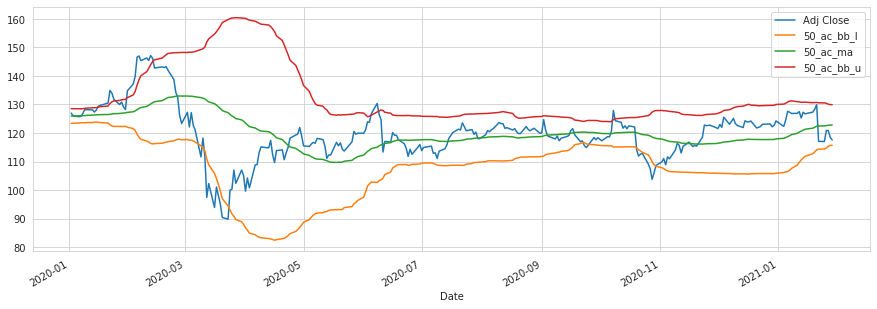

In [147]:
df_ibm[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

AMZN bollinger bands:

In [148]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_amzn[ub_column_name] = bollinger_bands(df_amzn['Adj Close'], window_size=mds)[1]
    df_amzn[lb_column_name] = bollinger_bands(df_amzn['Adj Close'], window_size=mds)[2]

In [149]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [150]:
df_amzn.fillna(method='backfill', inplace=True)

In [151]:
df_amzn.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-03-01,3127.889893,3149.560059,3097.989990,3146.139893,3146.139893,2729100,3198.671948,3257.981958,3231.172969,3377.903928,3019.439968,3438.263188,3077.700728,3388.284831,3074.061107
2021-03-02,3143.469971,3163.520020,3087.120117,3094.530029,3094.530029,2590000,3181.229956,3245.564465,3228.244370,3363.978772,2998.481141,3435.193617,3055.935313,3390.001899,3066.486841
2021-03-03,3081.179932,3107.780029,2995.000000,3005.000000,3005.000000,3967200,3150.865967,3226.814465,3223.622769,3340.306698,2961.425236,3433.835121,3019.793810,3397.236471,3050.009066
2021-03-04,3012.000000,3058.129883,2945.429932,2977.570068,2977.570068,5458700,3115.799976,3210.066467,3219.141172,3288.394254,2943.205697,3440.735551,2979.397384,3406.123858,3032.158485
2021-03-05,3005.000000,3009.000000,2881.000000,3000.459961,3000.459961,5383400,3090.855981,3193.539465,3215.026772,3248.791646,2932.920317,3434.845651,2952.233280,3411.962066,3018.091479


In [152]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822


In [153]:
start_date = '2020-01-1'
end_date = '2021-01-30'

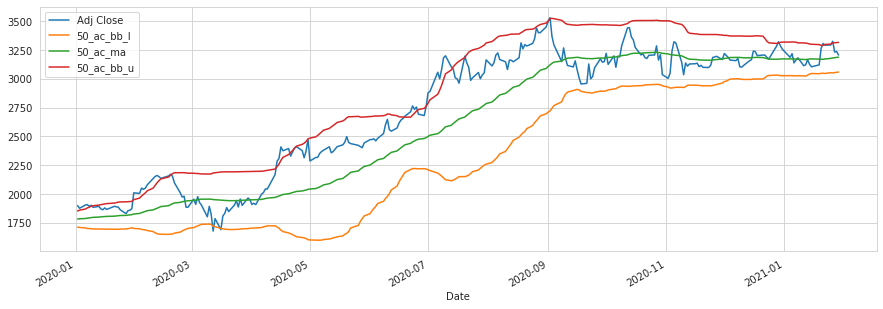

In [154]:
df_amzn[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

Apple bollinger bands:

In [155]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_aapl[ub_column_name] = bollinger_bands(df_aapl['Adj Close'], window_size=mds)[1]
    df_aapl[lb_column_name] = bollinger_bands(df_aapl['Adj Close'], window_size=mds)[2]

In [156]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [157]:
df_aapl.fillna(method='backfill', inplace=True)

In [158]:
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300,127.086000,131.304179,131.840745,135.066049,119.105951,141.686518,120.921841,141.633158,122.048332
2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300,126.279000,130.863187,131.790759,133.057281,119.500719,141.519782,120.206592,141.695991,121.885527
2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400,125.401000,130.226757,131.661799,131.818508,118.983492,141.403903,119.049611,141.903656,121.419943
2021-03-04,121.750000,123.599998,118.620003,120.129997,120.129997,177275300,124.442999,129.546249,131.534979,130.861833,118.024166,141.455994,117.636505,142.187967,120.881991
2021-03-05,120.980003,121.940002,117.570000,121.419998,121.419998,153590400,123.598000,128.757999,131.402606,128.983132,118.212867,140.625765,116.890234,142.392092,120.413120


In [159]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811


In [160]:
start_date = '2020-01-1'
end_date = '2021-01-30'

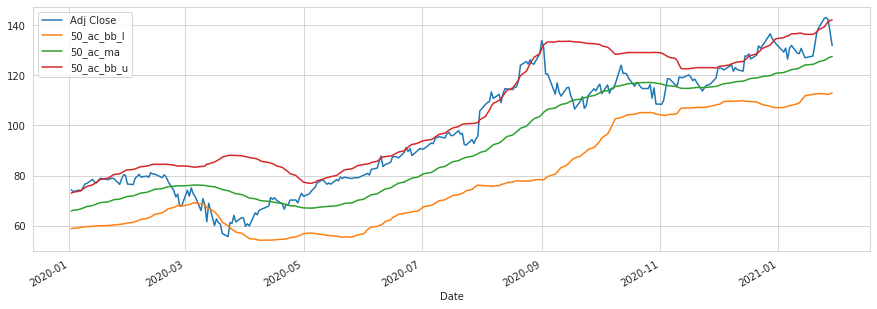

In [161]:
df_aapl[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

Alphabet Inc. bollinger bands:

In [162]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_googl[ub_column_name] = bollinger_bands(df_googl['Adj Close'], window_size=mds)[1]
    df_googl[lb_column_name] = bollinger_bands(df_googl['Adj Close'], window_size=mds)[2]

In [163]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [164]:
df_googl.fillna(method='backfill', inplace=True)

In [165]:
df_googl.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-03-01,2048.000000,2076.229980,2034.420044,2069.659912,2069.659912,1303000,2072.965027,2058.667499,1890.775398,2143.954578,2001.975475,2175.793684,1941.541314,2192.080104,1589.470692
2021-03-02,2064.840088,2094.739990,2056.669922,2064.479980,2064.479980,1277500,2068.343030,2067.238000,1896.921199,2134.249883,2002.436177,2154.663452,1979.812549,2199.636814,1594.205584
2021-03-03,2051.949951,2075.989990,1994.000000,2011.410034,2011.410034,1692200,2057.622021,2071.852502,1902.339199,2122.042636,1993.201407,2131.777352,2011.927653,2203.320669,1601.357729
2021-03-04,2014.869995,2074.590088,2005.430054,2033.930054,2033.930054,2457700,2050.434021,2070.605011,1908.493401,2106.450225,1994.417817,2132.667611,2008.542411,2207.352465,1609.634337
2021-03-05,2061.149902,2106.199951,2027.780029,2097.070068,2097.070068,2649400,2051.260022,2072.777020,1915.743601,2109.970089,1992.549955,2135.376468,2010.177572,2214.968470,1616.518732


In [166]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381


In [167]:
start_date = '2020-01-1'
end_date = '2021-01-30'

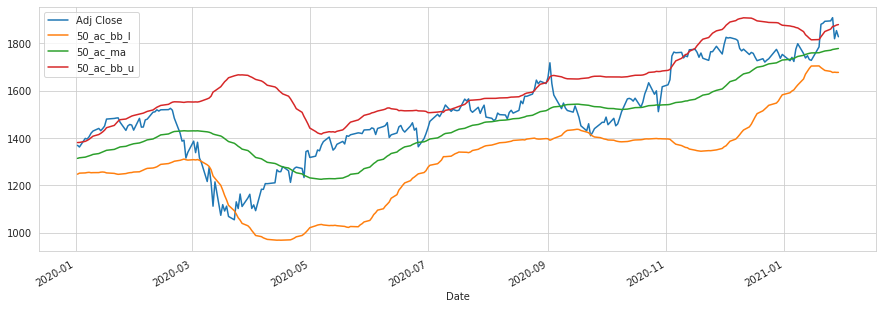

In [168]:
df_googl[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

# Data preparation

Data must be prepared in order to be processed by DeepAR model:
* Train/test set split
* Save Data locally
* Upload to S3

### Train and test set split

IBM Stock train, test and validation split

In [169]:
train_size = int(len(df_ibm) * 0.90)
test_size = int(len(df_ibm) * 0.08)
valid_size = len(df_ibm) - (train_size + test_size)
df_ibm_train, df_ibm_test, df_ibm_valid = df_ibm[0:train_size].copy(),\
                                            df_ibm[train_size:train_size+test_size].copy(),\
                                            df_ibm[train_size+test_size:len(df_ibm)].copy()
print(len(df_ibm), len(df_ibm_train), len(df_ibm_test), len(df_ibm_valid))

14896 13406 1191 299


In [170]:
assert(len(df_ibm) == (len(df_ibm_train) + len(df_ibm_test) + len(df_ibm_valid)))

Amazon Stock train test split

In [171]:
train_size = int(len(df_amzn) * 0.90)
test_size = int(len(df_amzn) * 0.08)
valid_size = len(df_amzn) - (train_size + test_size)
df_amzn_train, df_amzn_test, df_amzn_valid = df_amzn[0:train_size].copy(),\
                                            df_amzn[train_size:train_size+test_size].copy(),\
                                            df_amzn[train_size+test_size:len(df_amzn)].copy()
print(len(df_amzn), len(df_amzn_train), len(df_amzn_test), len(df_amzn_valid))

5991 5391 479 121


In [172]:
assert(len(df_amzn) == (len(df_amzn_train) + len(df_amzn_test) + len(df_amzn_valid)))

Apple Inc. Stock train test split

In [173]:
train_size = int(len(df_aapl) * 0.90)
test_size = int(len(df_aapl) * 0.08)
valid_size = len(df_aapl) - (train_size + test_size)
df_aapl_train, df_aapl_test, df_aapl_valid = df_aapl[0:train_size].copy(),\
                                            df_aapl[train_size:train_size+test_size].copy(),\
                                            df_aapl[train_size+test_size:len(df_aapl)].copy()
print(len(df_aapl), len(df_aapl_train), len(df_aapl_test), len(df_aapl_valid))

10142 9127 811 204


Alphabet Inc. Stock train test split

In [174]:
train_size = int(len(df_googl) * 0.90)
test_size = int(len(df_googl) * 0.08)
valid_size = len(df_googl) - (train_size + test_size)
df_googl_train, df_googl_test, df_googl_valid = df_googl[0:train_size].copy(),\
                                            df_googl[train_size:train_size+test_size].copy(),\
                                            df_googl[train_size+test_size:len(df_googl)].copy()
print(len(df_googl), len(df_googl_train), len(df_googl_test), len(df_googl_valid))

4165 3748 333 84


## Save Data Locally

In [226]:
data_dir = 'stock_deepar'

In [227]:
import os

In [228]:
data_dir_csv = os.path.join(data_dir, 'csv') # The folder we will use for storing data
if not os.path.exists(data_dir_csv): # Make sure that the folder exists
    os.makedirs(data_dir_csv)

In [229]:
interval ='D'

In [230]:
# IBM
df_ibm_train.to_csv(os.path.join(data_dir_csv, 'ibm_train.csv'), header=True, index=True)
df_ibm_test.to_csv(os.path.join(data_dir_csv, 'ibm_test.csv'), header=True, index=True)
df_ibm_valid.to_csv(os.path.join(data_dir_csv, 'ibm_valid.csv'), header=True, index=True)

In [231]:
# Apple Inc.
df_aapl_train.to_csv(os.path.join(data_dir_csv, 'aapl_train.csv'), header=True, index=True)
df_aapl_test.to_csv(os.path.join(data_dir_csv, 'aapl_test.csv'), header=True, index=True)
df_aapl_valid.to_csv(os.path.join(data_dir_csv, 'aapl_valid.csv'), header=True, index=True)

In [232]:
# Amazon.com
df_amzn_train.to_csv(os.path.join(data_dir_csv, 'amzn_train.csv'), header=True, index=True)
df_amzn_test.to_csv(os.path.join(data_dir_csv, 'amzn_test.csv'), header=True, index=True)
df_amzn_valid.to_csv(os.path.join(data_dir_csv, 'amzn_valid.csv'), header=True, index=True)

In [233]:
# Alphabet Inc.
df_googl_train.to_csv(os.path.join(data_dir_csv, 'googl_train.csv'), header=True, index=True)
df_googl_test.to_csv(os.path.join(data_dir_csv, 'googl_test.csv'), header=True, index=True)
df_googl_valid.to_csv(os.path.join(data_dir_csv, 'googl_valid.csv'), header=True, index=True)

### JSON serialization

In order to feed DeepAR model, JSON files must be prepared from data.
I'll dispose two kind of JSON inputs:
* one with "dynamic features", to use a DeepAR API terminology: all dataset features except for target column and related one ('Adj Close', 'Close');
* one without "dynamic features: only 'Adj Close' column will be fed to DeepAR model.

### JSON files

Now I'm going to convert data to JSON file format, in order to feed the DeepAR model correctly

As already announced, I will create two kind of time series, one with a list of dynamic features `dyn_feat`and the other one with only the target column (`Adj Close`) time series. 

In [234]:
# initializing train/test dataframe lists to iterate on them
dfs_train = [df_ibm_train, df_aapl_train, df_amzn_train, df_googl_train]
dfs_test = [df_ibm_test, df_aapl_test, df_amzn_test, df_googl_test]

Creating local storage path:

In [235]:
data_dir_json = os.path.join(data_dir, 'json')
if not os.path.exists(data_dir_json): # Make sure that the folder exists
    os.makedirs(data_dir_json)

Serializing data to json files

In [236]:
from source_deepar.deepar_utils import ts2json_serialize

Dataset with the `Adj Close` time series alone:

Training data:

In [237]:
data_dir_json_train = os.path.join(data_dir_json, 'train') # The folder we will use for storing data
if not os.path.exists(data_dir_json_train): # Make sure that the folder exists
    os.makedirs(data_dir_json_train)

In [238]:
for df, m in zip(dfs_train, mnemonics):
    ts2json_serialize(df, data_dir_json_train, m+'.json')

Test data:

In [239]:
data_dir_json_test = os.path.join(data_dir_json, 'test') # The folder we will use for storing data
if not os.path.exists(data_dir_json_test): # Make sure that the folder exists
    os.makedirs(data_dir_json_test)

In [240]:
for df, m in zip(dfs_test, mnemonics):
    ts2json_serialize(df, data_dir_json_test, m+'.json')

Dataset containing dynamic features:

Training data:

In [241]:
data_dir_json_dyn_feat = os.path.join(data_dir_json, 'w_dyn_feat')

In [242]:
data_dir_json_train_dyn_feat = os.path.join(data_dir_json_dyn_feat, 'train') # The folder we will use for storing data
if not os.path.exists(data_dir_json_train_dyn_feat): # Make sure that the folder exists
    os.makedirs(data_dir_json_train_dyn_feat)

In [243]:
for df, m in zip(dfs_train, mnemonics):
    ts2json_serialize(df, data_dir_json_train_dyn_feat, m+'.json', dyn_feat=['Open'])

Test data:

In [244]:
data_dir_json_test_dyn_feat = os.path.join(data_dir_json_dyn_feat, 'test') # The folder we will use for storing data
if not os.path.exists(data_dir_json_test_dyn_feat): # Make sure that the folder exists
    os.makedirs(data_dir_json_test_dyn_feat)

In [245]:
for df, m in zip(dfs_test, mnemonics):
    ts2json_serialize(df, data_dir_json_test_dyn_feat, m+'.json', dyn_feat=['Open'])

## Uploading data to S3

In [246]:
import sagemaker
# Define IAM role and session
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()

#Define training data location
s3_data_key = 'stock-deepar/train_artifacts'
s3_bucket = sagemaker_session.default_bucket()
interval = 'D' #Use D or H
s3_output_path = "s3://{}/{}/{}/output".format(s3_bucket, s3_data_key, interval)


In [247]:
# *unique* train/test prefixes
train_prefix   = '{}/{}'.format(data_dir_json, 'train')
test_prefix    = '{}/{}'.format(data_dir_json, 'test')
train_prefix_dyn_feat   = '{}/{}'.format(data_dir_json_dyn_feat, 'train')
test_prefix_dyn_feat    = '{}/{}'.format(data_dir_json_dyn_feat, 'test')

In [248]:
input_data_train = sagemaker_session.upload_data(path=data_dir_json_train, bucket=s3_bucket, key_prefix=train_prefix)

In [249]:
input_data_test = sagemaker_session.upload_data(path=data_dir_json_test, bucket=s3_bucket, key_prefix=test_prefix)

In [250]:
input_data_train_dyn_feat = sagemaker_session.upload_data(path=data_dir_json_train, bucket=s3_bucket, key_prefix=train_prefix_dyn_feat)

In [251]:
input_data_test_dyn_feat = sagemaker_session.upload_data(path=data_dir_json_test, bucket=s3_bucket, key_prefix=test_prefix_dyn_feat)

### Hyperparameters

DeepAR is the model of choice of this project.
This model expects input data to be already test-train splitted.
A big part of the model design has to be done looking close at data.
More specifically, defining these two hyperparameters about the data:
* Context length
* Prediction length

### Prediction length

This is the length of the time series future predictions in days. It will be conveniently set to 5 days (exactly a week of trading hours) because a shorter interval would be of little significance.
A longer interval could be interesting from an application point of view, but it can be challenging in terms of model performances.

### Context length

Context length can be either:
* designed on patterns or seasonality observed in the data, if any is present;
* chosen as a fixed value. This will be my choice, and it will be the same as the moving average window, in order to have a good reference metrics, applicable to both this model and the benchmark model.

To explore this second option, we will refer to what we've found during the EDA stage.

In [252]:
'''
covariate_columns = list(df_ibm.columns)
covariate_columns.remove('Close')
covariate_columns.remove('Adj Close')
'''

"\ncovariate_columns = list(df_ibm.columns)\ncovariate_columns.remove('Close')\ncovariate_columns.remove('Adj Close')\n"

In [259]:
from source_deepar import deepar_utils

#Define parameters

context_length = [10, 20, 50]
prediction_length = [5, 10, 25]    

# setting target columns
target_column = 'Adj Close'

# retrieving covariate columns
'''covariate_columns = list(df_ibm.columns)
covariate_columns.remove('Close')
covariate_columns.remove('Adj Close')
'''
train_test_split = 0.9
num_test_windows = 4
    
    
hyperparameters = {
    "prediction_length": str(prediction_length[0]), #number of time-steps model is trained to predict, always generates forecasts with this length
    "context_length": str(context_length[0]), #number of time-points that the model gets to see before making the prediction, should be about same as the prediction_length
    "time_freq": interval, #granularity of the time series in the dataset
    "epochs": "200", #maximum number of passes over the training data
    "early_stopping_patience": "40", #training stops when no progress is made within the specified number of epochs
    "num_layers": "2", #number of hidden layers in the RNN, typically range from 1 to 4    
    "num_cells": "40", #number of cells to use in each hidden layer of the RNN, typically range from 30 to 100
    "mini_batch_size": "128", #size of mini-batches used during training, typically values range from 32 to 512
    "learning_rate": "1e-3", #learning rate used in training. Typical values range from 1e-4 to 1e-1
    "dropout_rate": "0.1", # dropout rate to use for regularization, typically less than 0.2. 
    "likelihood": "gaussian" #noise model used for uncertainty estimates - gaussian/beta/negative-binomial/student-T/deterministic-L1
}

In [260]:

# Define IAM role and session
role = sagemaker.get_execution_role()
session = sagemaker.Session()

#Obtain container image URI for SageMaker-DeepAR algorithm, based on region
region = session.boto_region_name
image_name = sagemaker.amazon.amazon_estimator.get_image_uri(region, "forecasting-deepar", "latest")
print("Model will be trained using container image : {}".format(image_name))

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: latest.


Model will be trained using container image : 495149712605.dkr.ecr.eu-central-1.amazonaws.com/forecasting-deepar:1


## Estimator Instantiation

In [261]:
from sagemaker.estimator import Estimator

# instantiate a DeepAR estimator
estimator = Estimator(image_uri=image_name,
                      sagemaker_session=sagemaker_session,
                      image_name=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c4.xlarge',
                      output_path=s3_output_path,
                      hyperparameters=hyperparameters
                      )

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


## Training Job Creation

Creation of a training job with stand alone time series (no dynamic features provided).

In [262]:
%%time
# train and test channels
data_channels = {
    "train": input_data_train,
    "test": input_data_test
}

# fit the estimator
estimator.fit(inputs=data_channels)

2021-03-06 21:15:30 Starting - Starting the training job...
2021-03-06 21:15:54 Starting - Launching requested ML instancesProfilerReport-1615065330: InProgress
......
2021-03-06 21:16:54 Starting - Preparing the instances for training.........
2021-03-06 21:18:22 Downloading - Downloading input data
2021-03-06 21:18:22 Training - Downloading the training image..Arguments: train
[03/06/2021 21:18:40 INFO 139741071263552] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stoppi

# Generating Predictions

According to the [inference format](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar-in-formats.html) for DeepAR, the `predictor` expects to see input data in a JSON format, with the following keys:
* **instances**: A list of JSON-formatted time series that should be forecast by the model.
* **configuration** (optional): A dictionary of configuration information for the type of response desired by the request.

Within configuration the following keys can be configured:
* **num_samples**: An integer specifying the number of samples that the model generates when making a probabilistic prediction.
* **output_types**: A list specifying the type of response. We'll ask for **quantiles**, which look at the list of num_samples generated by the model, and generate [quantile estimates](https://en.wikipedia.org/wiki/Quantile) for each time point based on these values.
* **quantiles**: A list that specified which quantiles estimates are generated and returned in the response.


Below is an example of what a JSON query to a DeepAR model endpoint might look like.

```
{
 "instances": [
  { "start": "2009-11-01 00:00:00", "target": [4.0, 10.0, 50.0, 100.0, 113.0] },
  { "start": "1999-01-30", "target": [2.0, 1.0] }
 ],
 "configuration": {
  "num_samples": 50,
  "output_types": ["quantiles"],
  "quantiles": ["0.5", "0.9"]
 }
}
```

## JSON Prediction Request

The code below accepts a **list** of time series as input and some configuration parameters. It then formats that series into a JSON instance and converts the input into an appropriately formatted JSON_input.

In [266]:
def json_predictor_input(input_ts, num_samples=50, quantiles=['0.1', '0.5', '0.9']):
    '''Accepts a list of input time series and produces a formatted input.
       :input_ts: An list of input time series.
       :num_samples: Number of samples to calculate metrics with.
       :quantiles: A list of quantiles to return in the predicted output.
       :return: The JSON-formatted input.
       '''
    # request data is made of JSON objects (instances)
    # and an output configuration that details the type of data/quantiles we want
    
    instances = []
    for k in range(len(input_ts)):
        # get JSON objects for input time series
        instances.append(series_to_json_obj(input_ts[k]))

    # specify the output quantiles and samples
    configuration = {"num_samples": num_samples, 
                     "output_types": ["quantiles"], 
                     "quantiles": quantiles}

    request_data = {"instances": instances, 
                    "configuration": configuration}

    json_request = json.dumps(request_data).encode('utf-8')
    
    return json_request

### Get a Prediction

We can then use this function to get a prediction for a formatted time series!

In the next cell, I'm getting an input time series and known target, and passing the formatted input into the predictor endpoint to get a resultant prediction.

In [265]:
df_ibm_valid['Adj Close'].head()

Date
2019-12-27    126.834549
2019-12-30    124.527962
2019-12-31    125.681244
2020-01-02    126.975204
2020-01-03    125.962540
Name: Adj Close, dtype: float64

In [ ]:
# get all input and target (test) time series
input_ts = df_ibm_valid['Adj Close']
target_ts = time_series

# get formatted input time series
json_input_ts = json_predictor_input(input_ts)

# get the prediction from the predictor
json_prediction = predictor.predict(json_input_ts)

#print(json_prediction)